In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
import xgboost as xgb

import shap

from sklearn.metrics import accuracy_score,confusion_matrix

#set figure background to white
plt.rcParams.update({'figure.facecolor':'white'})

### Descrição das Variáveis - Mushroom Dataset

Este dataset contém amostras de cogumelos com diferentes características morfológicas, sendo a variável-alvo (`class`) a comestibilidade do cogumelo.

#### Variável-alvo:
- **class**: Indica se o cogumelo é comestível ou venenoso.

#### Variáveis explicativas (features):
- **cap-shape**: Formato do chapéu do cogumelo.
- **cap-surface**: Textura da superfície do chapéu.
- **cap-color**: Cor do chapéu.
- **bruises**: Presença ou ausência de machucados.
- **odor**: Odor emitido pelo cogumelo.
- **gill-attachment**: Forma de ligação das lamelas ao caule.
- **gill-spacing**: Espaçamento entre as lamelas.
- **gill-size**: Tamanho das lamelas.
- **gill-color**: Cor das lamelas.
- **stalk-shape**: Formato do caule.
- **stalk-root**: Tipo de raiz do caule (alguns valores podem estar ausentes).
- **stalk-surface-above-ring**: Textura da superfície do caule acima do anel.
- **stalk-surface-below-ring**: Textura da superfície do caule abaixo do anel.
- **stalk-color-above-ring**: Cor do caule acima do anel.
- **stalk-color-below-ring**: Cor do caule abaixo do anel.
- **veil-type**: Tipo de véu (valor constante).
- **veil-color**: Cor do véu.
- **ring-number**: Número de anéis no caule.
- **ring-type**: Tipo de anel presente no caule.
- **spore-print-color**: Cor do esporo deixado após impressão.
- **population**: Tamanho estimado da população onde o cogumelo foi encontrado.
- **habitat**: Tipo de ambiente natural onde o cogumelo cresce.


## Dataset

In [2]:
#load data 
data = pd.read_csv("data/mushrooms.csv")

#get features
y = data['class']
y = y.astype('category').cat.codes
X = data.drop('class', axis=1)

print(len(data))
data.head()

8124


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## XGBoost

In [4]:
# Create dummy variables for the categorical features
X_dummy = pd.get_dummies(X)

# Fit model
model = xgb.XGBClassifier()
model.fit(X_dummy, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

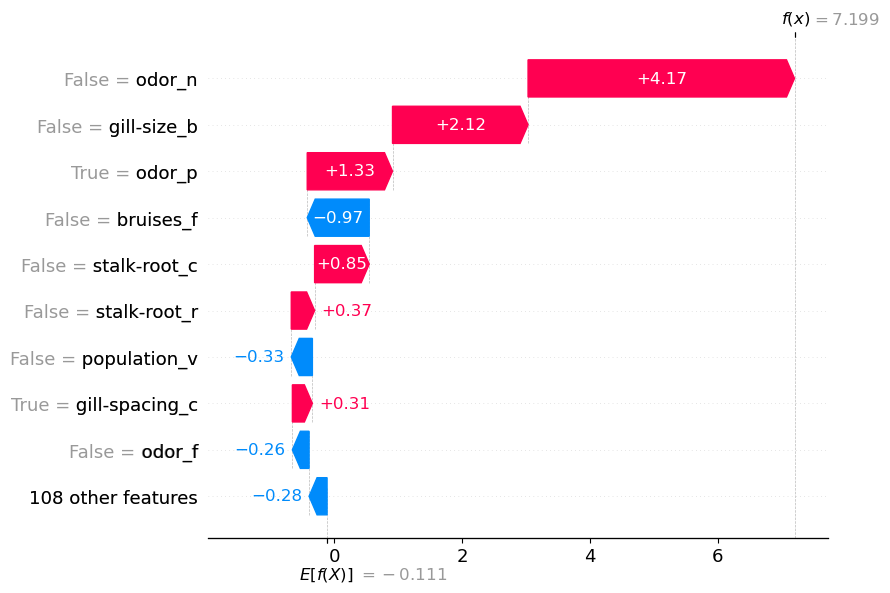

In [5]:
#Get SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_dummy)

# Display SHAP values for the first observation
shap.plots.waterfall(shap_values[0])

## CatBoost

In [4]:
model = CatBoostClassifier(iterations=20,
                           learning_rate=0.01,
                           depth=3)

# train model
cat_features = list(range(len(X.columns)))
model.fit(X, y, cat_features)

0:	learn: 0.6660194	total: 54.9ms	remaining: 1.04s
1:	learn: 0.6373576	total: 59.8ms	remaining: 538ms
2:	learn: 0.6125475	total: 64.4ms	remaining: 365ms
3:	learn: 0.5880232	total: 68.5ms	remaining: 274ms
4:	learn: 0.5652512	total: 72.9ms	remaining: 219ms
5:	learn: 0.5428184	total: 77.2ms	remaining: 180ms
6:	learn: 0.5222711	total: 81.1ms	remaining: 151ms
7:	learn: 0.5016943	total: 85.5ms	remaining: 128ms
8:	learn: 0.4779907	total: 89.8ms	remaining: 110ms
9:	learn: 0.4601680	total: 93.9ms	remaining: 93.9ms
10:	learn: 0.4447001	total: 98.2ms	remaining: 80.4ms
11:	learn: 0.4281286	total: 102ms	remaining: 68.1ms
12:	learn: 0.4125468	total: 107ms	remaining: 57.4ms
13:	learn: 0.3990776	total: 111ms	remaining: 47.5ms
14:	learn: 0.3861614	total: 115ms	remaining: 38.3ms
15:	learn: 0.3724813	total: 119ms	remaining: 29.8ms
16:	learn: 0.3560532	total: 123ms	remaining: 21.8ms
17:	learn: 0.3448969	total: 127ms	remaining: 14.1ms
18:	learn: 0.3331749	total: 131ms	remaining: 6.91ms
19:	learn: 0.3218024

In [6]:
#Get SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

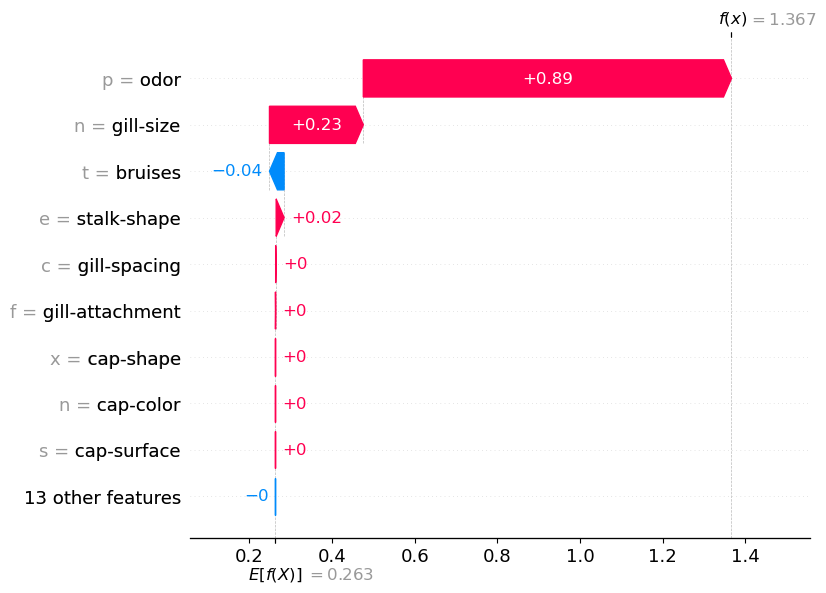

In [7]:
# Display SHAP values for the first observation
shap.plots.waterfall(shap_values[0])

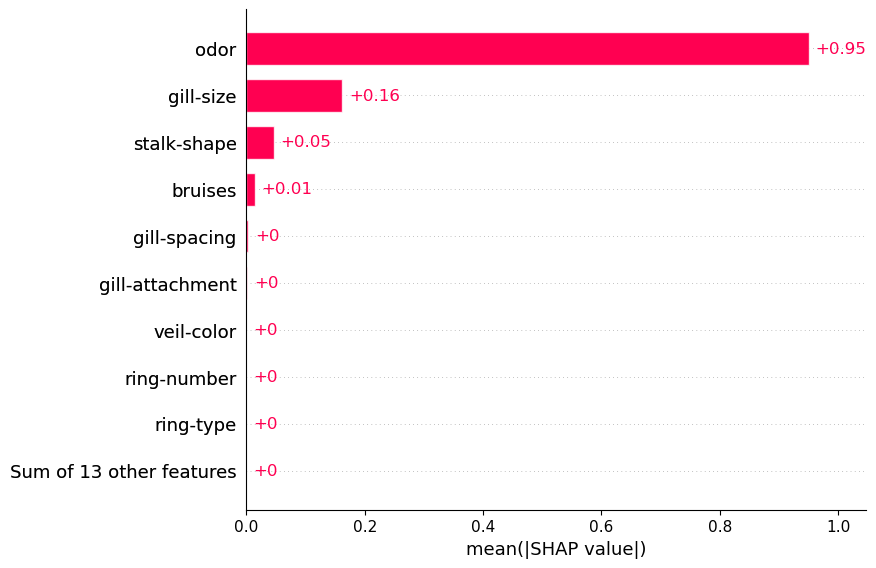

In [8]:
# Mean SHAP 
shap.plots.bar(shap_values)